<a href="https://colab.research.google.com/github/Pravalika-Challuri/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Step 2:Load dataset

In [ ]:
#Assuming dataset is loaded in a csv file called 'toyota_corolla.csv'

In [ ]:
df=pd.read_csv('toyota_corolla.csv')

In [ ]:
df.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df1 = df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']] # Assign the subset of columns from 'df' to 'df1'
df1 # Display the 'df1' dataframe

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500,23,46986,90,2000,3,5,1165
1,13750,23,72937,90,2000,3,5,1165
2,13950,24,41711,90,2000,3,5,1165
3,14950,26,48000,90,2000,3,5,1165
4,13750,30,38500,90,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,1025
1432,10845,72,19000,86,1300,3,5,1015
1433,8500,71,17016,86,1300,3,5,1015
1434,7250,70,16916,86,1300,3,5,1015


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   cc         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [ ]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,1615.00000


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


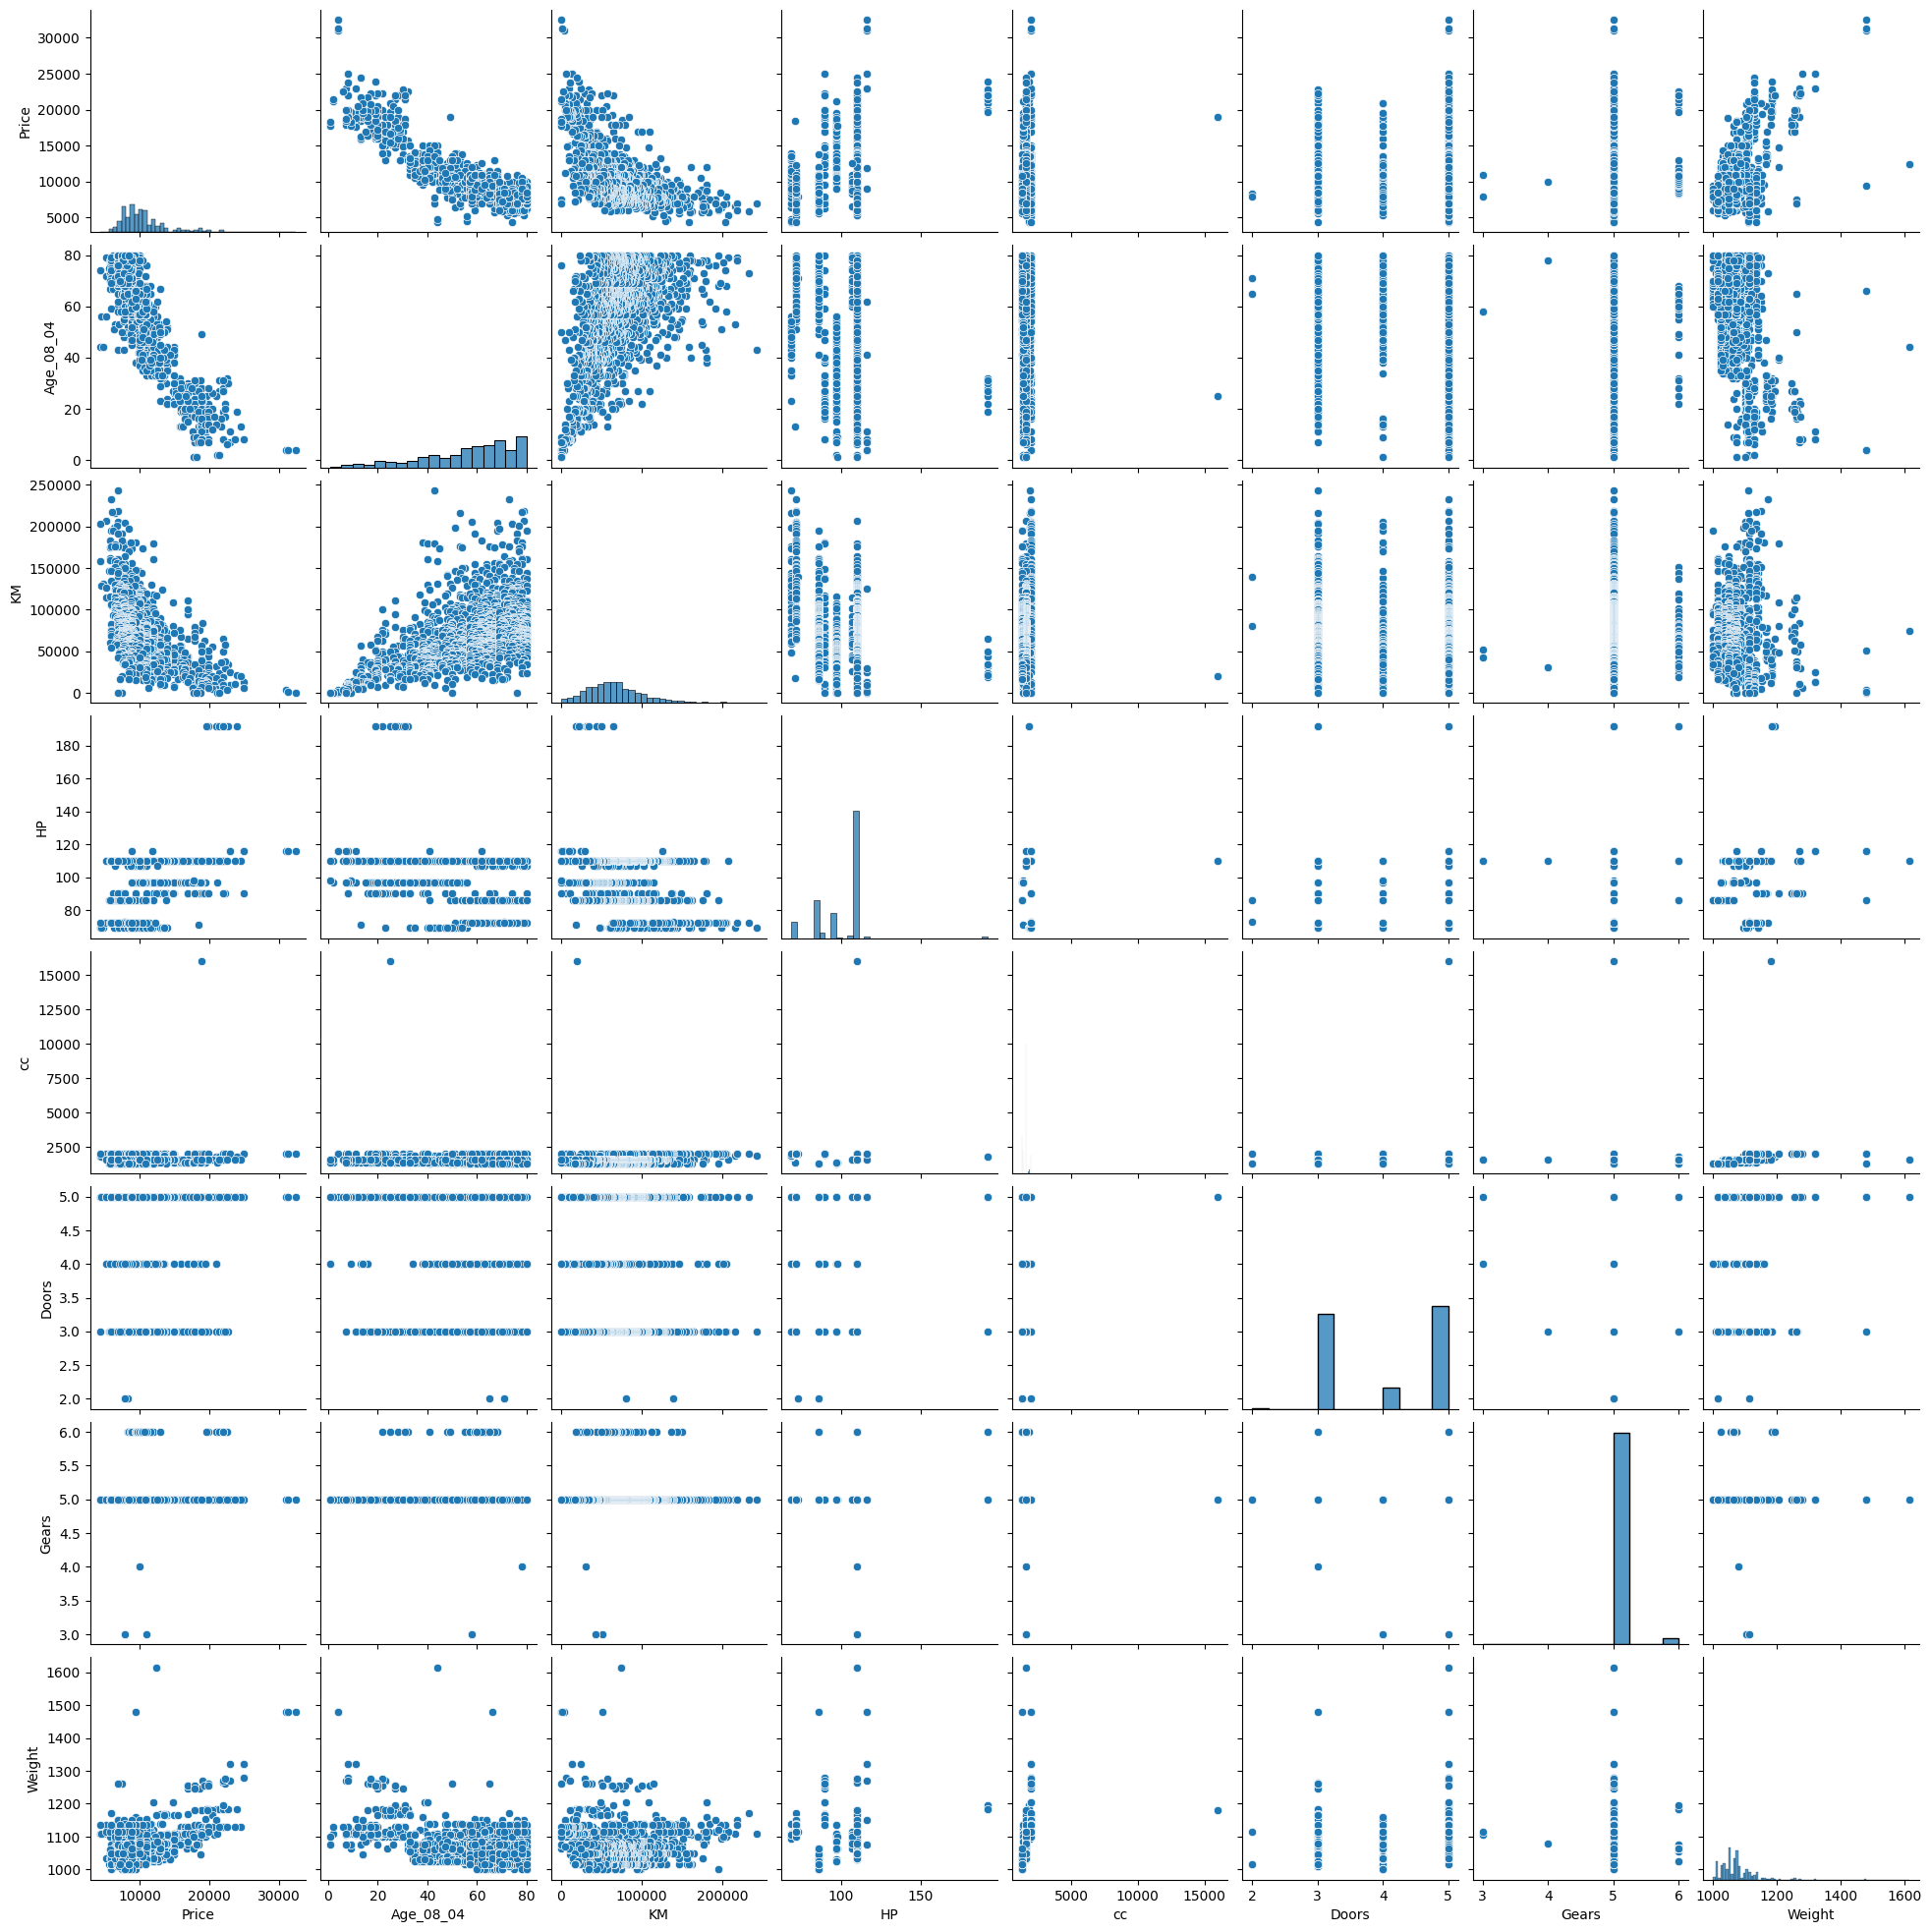

In [ ]:
sns.pairplot(df1)

Coorelation Matrix

<Axes: >

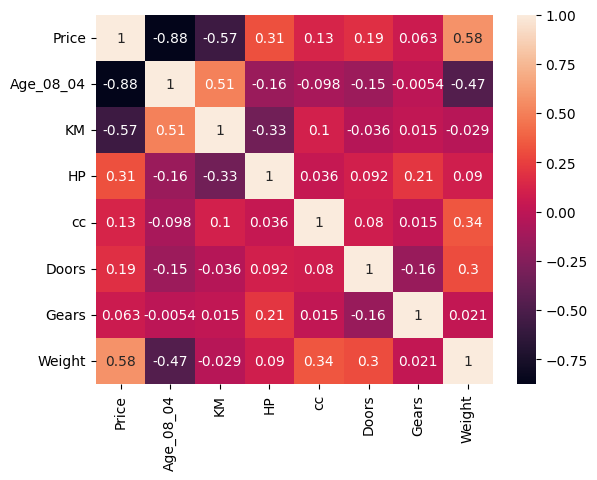

In [ ]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)

Regression Model

In [ ]:
X = df1[['Age_08_04','KM','HP','cc','Doors','Gears','Weight']]
Y = df1[['Price']]

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.404e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                        0.00
Time:                        06:02:08   Log-Likelihood:                         -12395.
No. Observations:                1436   AIC:                                  2.480e+04
Df Residuals:                    1429   BIC:                                  2.484e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -128.2143      2.393    -53.582      0.000    -132.908    -123.520
KM            -0.0187      0.001    -15.482      0.000      -0.021      -0.016
HP            28.8810      2.643     10.928      0.000      23.697      34.065
cc            -0.0387      0.090     -0.430      0.667      -0.215       0.138
Doors        -25.2960     40.304     -0.628      0.530    -104.358      53.766
Gears       -120.0561    143.314     -0.838      0.402    -401.184     161.072
Weight        15.8755      0.673     23.580      0.000      14.555      17.196
==============================================================================
Omnibus:                      135.961   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.322
Skew:                          -0.097   Prob(JB):                    6.32e-195
Kurtosis:                       6.861   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Solving Multicollinearity

In [ ]:
#Finding cook's distance
infl = model.get_influence()
summ_df = infl.summary_frame()

In [ ]:
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,3.749299e-01,-1.901885,-0.691421,1.287699e+01,0.526698,1.098970e+00,-3.326238e+00,2.349123e+01,4.429284,0.893411,12.823362,4.458445,12.907786
221,-4.212948e-01,0.154975,-0.021303,5.352076e-01,0.530524,1.554774e+00,-1.718483e+00,4.229650e-01,-6.504662,0.065400,-1.720684,-6.600841,-1.746127
960,-4.782657e-01,0.334199,0.213452,3.747928e-01,0.547585,9.448874e-01,-1.176473e+00,2.053676e-01,-4.885950,0.056798,-1.198988,-4.925556,-1.208707
109,2.763611e-02,-0.214412,-0.000407,-1.493703e-01,-0.265886,-7.679024e-01,8.829243e-01,1.377379e-01,5.217905,0.034202,0.981919,5.266491,0.991062
111,1.970397e-02,-0.171145,0.001602,-1.240829e-01,-0.219535,-6.337624e-01,7.280623e-01,9.418834e-02,4.321734,0.034097,0.811984,4.348735,0.817057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,-8.838964e-05,0.000165,-0.000055,-6.626014e-05,-0.000027,-4.609630e-05,7.410883e-05,1.204683e-08,-0.006869,0.001784,-0.000290,-0.006866,-0.000290
1245,-1.664668e-04,0.000021,-0.000084,-1.006819e-05,-0.000140,8.285861e-05,3.110237e-06,1.202551e-08,-0.005445,0.002831,-0.000290,-0.005443,-0.000290
56,-1.299069e-04,-0.000005,-0.000065,-6.516196e-05,0.000097,3.575043e-05,9.501124e-06,8.227166e-09,0.004216,0.003229,0.000240,0.004215,0.000240
283,-6.119619e-06,-0.000002,0.000004,-1.041464e-06,0.000010,-2.173484e-06,4.825987e-07,6.306813e-11,0.000483,0.001889,0.000021,0.000483,0.000021


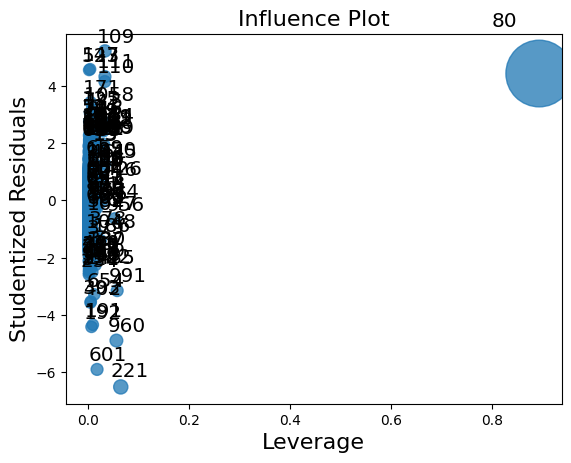

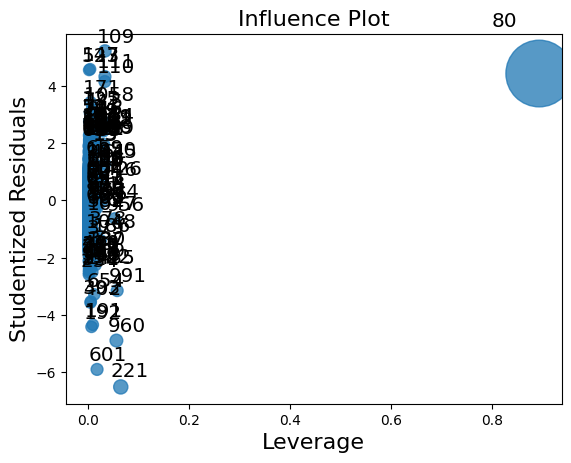

In [ ]:
infl.plot_influence()

Finding variance inflation vactor(VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,15.5,Age_08_04
1,6.9,KM
2,57.1,HP
3,16.8,cc
4,21.7,Doors
5,403.8,Gears
6,406.1,Weight


Removed Weight From the DataFrame and tested the model

In [ ]:
new_X = df1[['Age_08_04','KM','HP','cc','Doors','Gears']]

In [ ]:

new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.173e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                        0.00
Time:                        06:10:40   Log-Likelihood:                         -12631.
No. Observations:                1436   AIC:                                  2.527e+04
Df Residuals:                    1430   BIC:                                  2.530e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -146.2519      2.671    -54.749      0.000    -151.492    -141.012
KM            -0.0141      0.001    -10.011      0.000      -0.017      -0.011
HP            32.1721      3.109     10.347      0.000      26.073      38.271
cc             0.5779      0.102      5.690      0.000       0.379       0.777
Doors        345.6124     43.720      7.905      0.000     259.850     431.375
Gears       2843.3474     81.156     35.036      0.000    2684.150    3002.545
==============================================================================
Omnibus:                      368.625   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2600.479
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       9.279   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Final Model

In [ ]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df1.drop(df1.index[80])

In [ ]:
new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears']]
new_Y = new_df[['Price']]


In [ ]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.241e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                        0.00
Time:                        06:14:34   Log-Likelihood:                         -12581.
No. Observations:                1435   AIC:                                  2.517e+04
Df Residuals:                    1429   BIC:                                  2.521e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -139.7245      2.691    -51.919      0.000    -145.004    -134.445
KM            -0.0197      0.001    -13.158      0.000      -0.023      -0.017
HP            27.8260      3.059      9.098      0.000      21.826      33.826
cc             2.6129      0.242     10.800      0.000       2.138       3.088
Doors        286.6404     42.971      6.671      0.000     202.348     370.933
Gears       2349.2248     95.381     24.630      0.000    2162.122    2536.327
==============================================================================
Omnibus:                      287.086   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.967
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       8.115   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Output Interpretation

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == -132.01
Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983
Thus the model explains 98.3% of the variance in dependent variable1